Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Turnover By Staff Category & Staff Group

In [1]:
data = pd.read_excel("Turnover by HG CHO.xlsx")
data

<IPython.core.display.Javascript object>

,Turnover By Service & Hospital Group / CHO,2020,2021,2022
0,National Ambulance Service,0.081514,0.049988,0.120089
1,Children's Health Ireland,0.099501,0.102924,0.153666
2,Dublin Midlands Hospital Group,0.080302,0.091540,0.108940
3,Ireland East Hospital Group,0.082903,0.084484,0.114259
4,RCSI Hospitals Group,0.078494,0.094367,0.101025
5,Saolta University Hospital Care,0.073149,0.068704,0.093604
6,South/South West Hospital Group,0.049031,0.066819,0.091643
7,University of Limerick Hospital Group,0.084971,0.078380,0.091115
8,Other Acute Services,0.081563,0.017910,0.115385
9,CHO 1,0.049268,0.058015,0.079225


In [3]:
data[2020] = data[2020]*100
data[2021] = data[2021]*100
data[2022] = data[2022]*100

In [4]:
data.head()

,Turnover By Service & Hospital Group / CHO,2020,2021,2022
0,National Ambulance Service,8.151431,4.998810,12.008948
1,Children's Health Ireland,9.950120,10.292436,15.366622
2,Dublin Midlands Hospital Group,8.030176,9.153994,10.894015
3,Ireland East Hospital Group,8.290314,8.448418,11.425856
4,RCSI Hospitals Group,7.849362,9.436684,10.102532


In [5]:
data.describe()

,2020,2021,2022
count,20.000000,20.000000,20.000000
mean,6.876389,7.283041,10.489344
std,1.865967,2.393298,1.766559
min,2.995580,1.791045,7.269450
25%,5.376963,5.643955,9.311397
50%,7.582143,7.354192,10.537978
75%,8.189826,8.927025,11.454007
max,9.950120,11.886616,15.366622


In [6]:
# Calculate average turnover by staff category
data['Average Turnover'] = data[[2020, 2021, 2022]].mean(axis=1)

In [7]:
data.head()

,Turnover By Service & Hospital Group / CHO,2020,2021,2022,Average Turnover
0,National Ambulance Service,8.151431,4.998810,12.008948,8.386396
1,Children's Health Ireland,9.950120,10.292436,15.366622,11.869726
2,Dublin Midlands Hospital Group,8.030176,9.153994,10.894015,9.359395
3,Ireland East Hospital Group,8.290314,8.448418,11.425856,9.388196
4,RCSI Hospitals Group,7.849362,9.436684,10.102532,9.129526


In [8]:
data = data.sort_values(by='Average Turnover', ascending=False)

Average Turnover

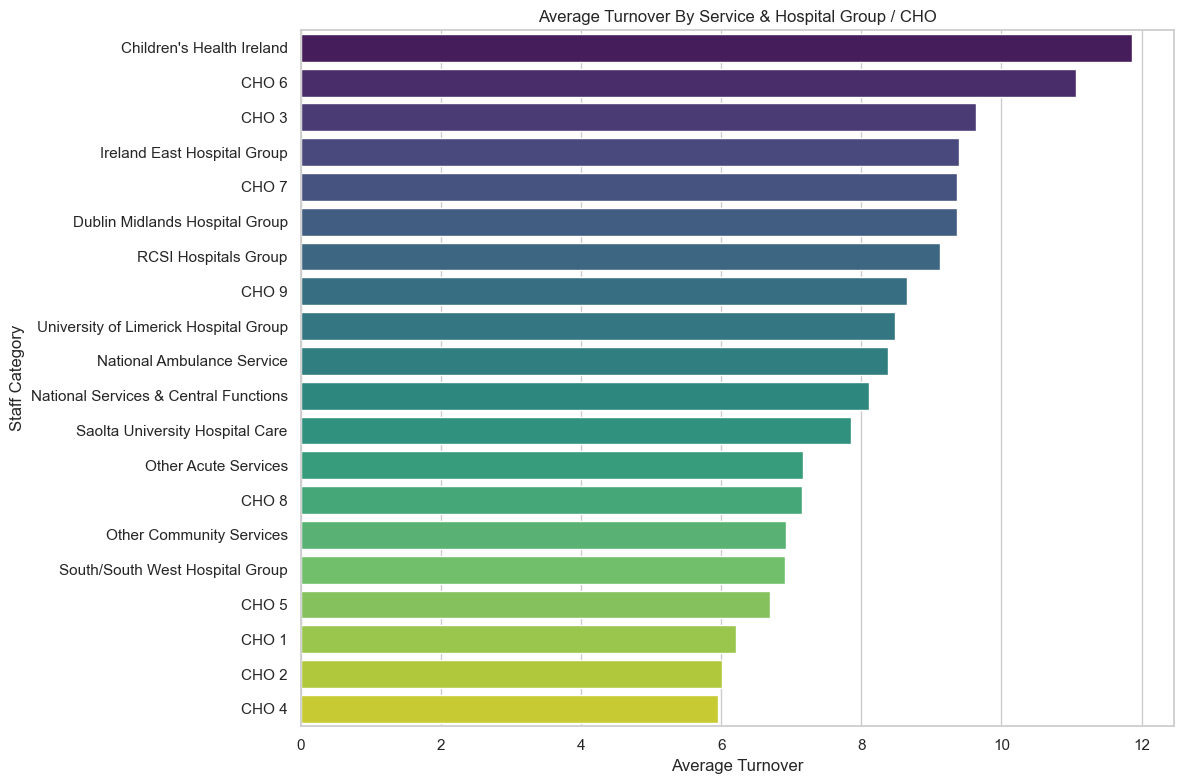

In [9]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Visualization 1: Bar plot for average turnover by staff category
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Turnover', y='Turnover By Service & Hospital Group / CHO', data=data, palette='viridis')
plt.xlabel('Average Turnover')
plt.ylabel('Staff Category')
plt.title('Average Turnover By Service & Hospital Group / CHO')
plt.tight_layout()
plt.show()

Turnover trends by staff category over the years

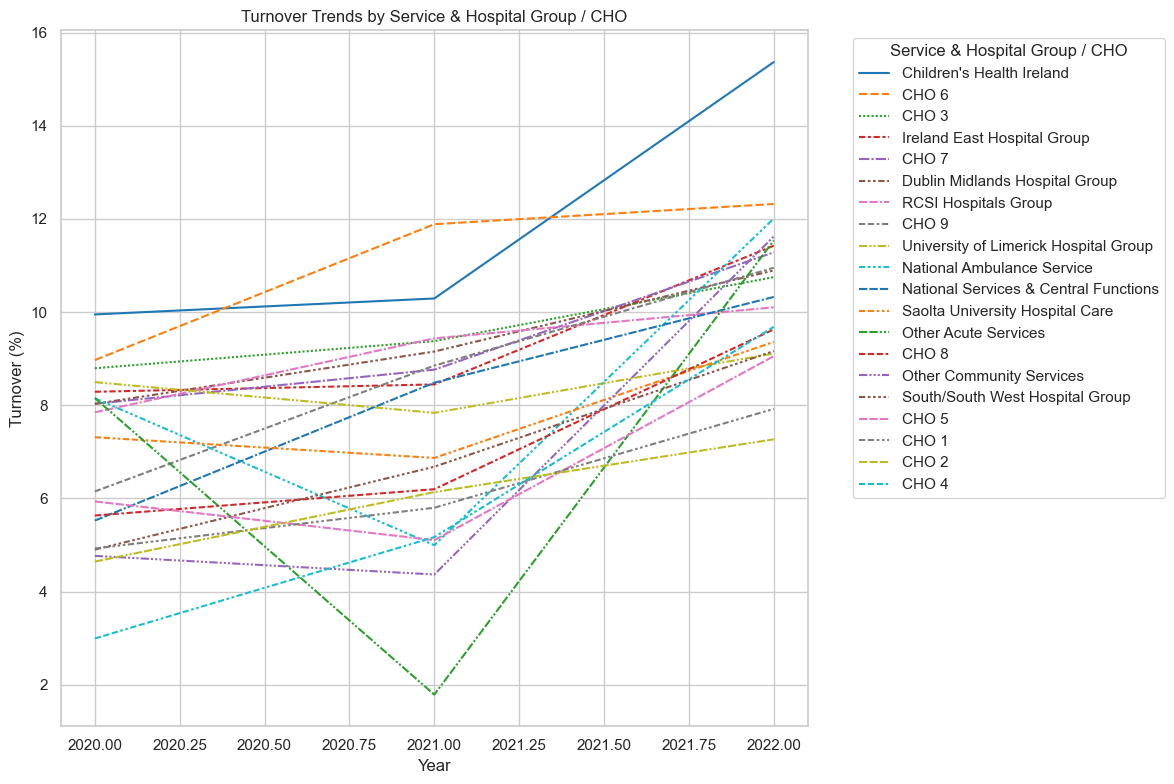

In [10]:
# Visualization 2: Line plot for turnover trends by staff category over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=data.drop('Average Turnover', axis=1).set_index('Turnover By Service & Hospital Group / CHO').T, palette='tab10')
plt.xlabel('Year')
plt.ylabel('Turnover (%)')
plt.title('Turnover Trends by Service & Hospital Group / CHO')
plt.legend(title='Service & Hospital Group / CHO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Compare turnover distributions for each year

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


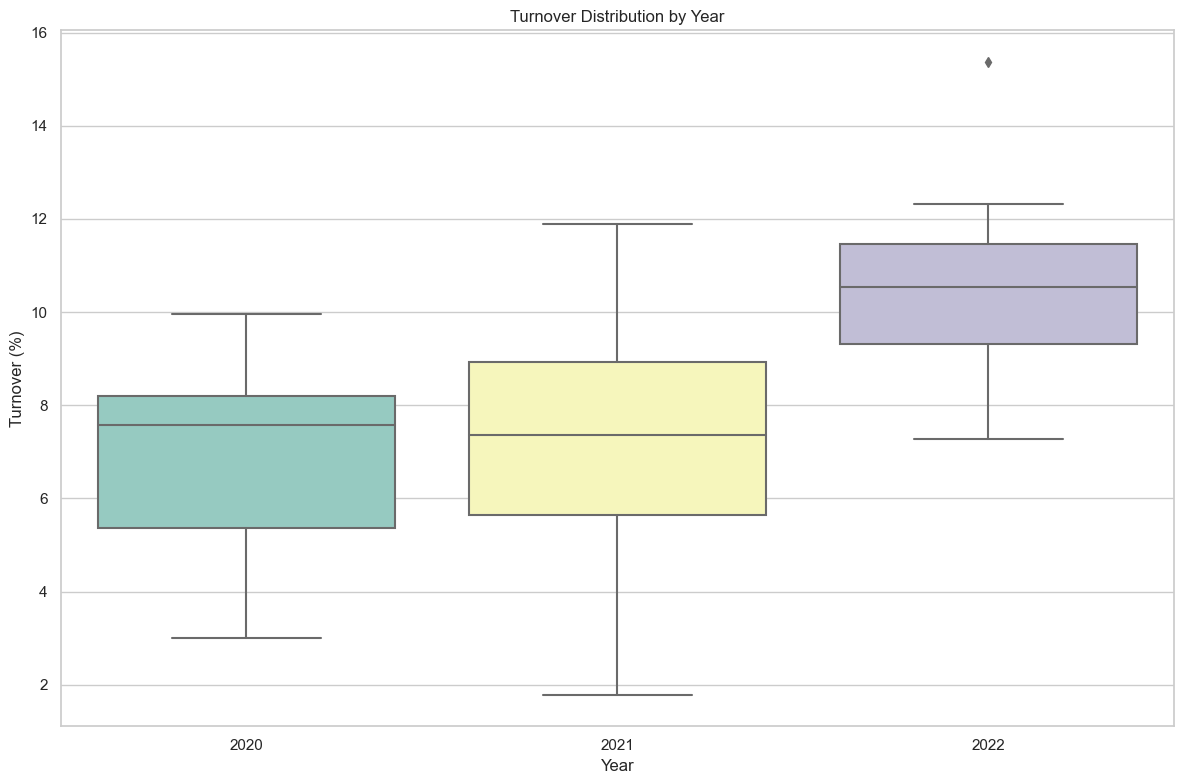

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop('Average Turnover', axis=1), palette='Set3')
plt.xlabel('Year')
plt.ylabel('Turnover (%)')
plt.title('Turnover Distribution by Year')
plt.tight_layout()
plt.show()

correlation matrix for turnover rates across years

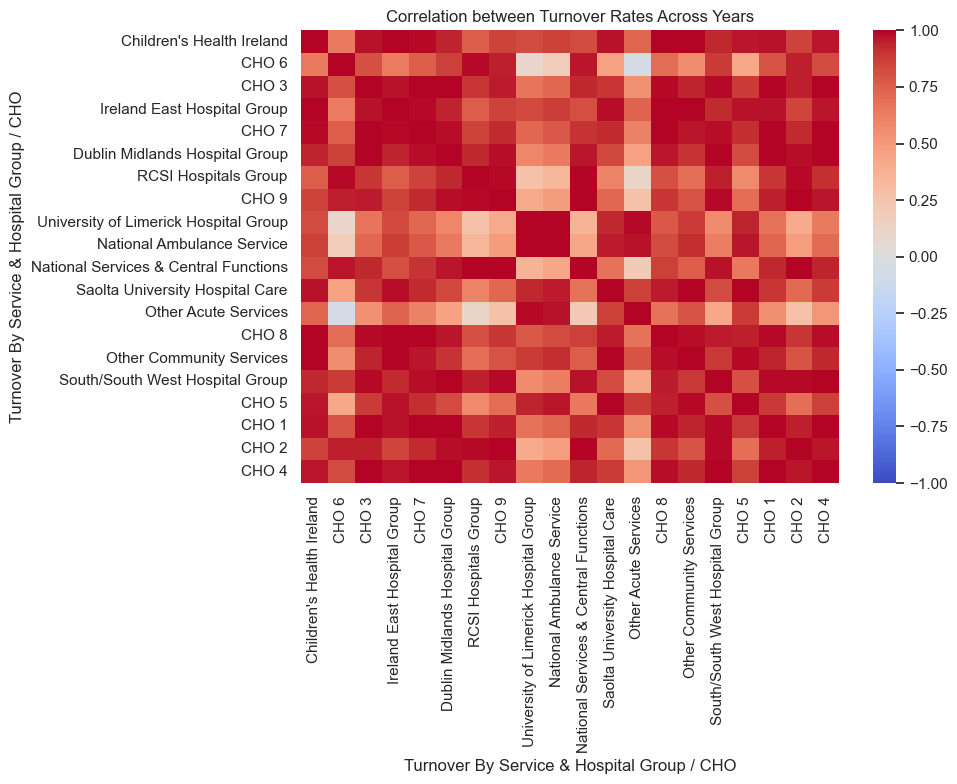

In [12]:
# Calculate the correlation matrix for turnover rates across years
correlation_matrix = data.drop(['Average Turnover'], axis=1).set_index('Turnover By Service & Hospital Group / CHO').T.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Turnover Rates Across Years')
plt.tight_layout()
plt.show()